In [1]:
pip install librosa

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
'''
Please install this specific version of resampy for librosa to work without errors.
'''

'\nPlease install this specific version of resampy for librosa to work without errors.\n'

In [3]:
pip install resampy==0.3.1

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import soundfile
import os
import glob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import librosa
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report
import warnings; warnings.filterwarnings('ignore')


In [6]:
emotions ={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

### Data for binary classification


In [7]:
def load_extract_features(data_path):

    '''
    load_extract_features() is a function that is used to load all the audio files one at a time, compute their features and return the features as well as the target values.

    There are around 8-10 audio files which are corrupted. We hardcode zero values for such files in order to maintain consistency.

    ['calm', 'happy'] emotion data is categorized into 'positive' and  ['angry', 'fearful'] into 'negative'

    Returns:
    1. Features
    2. Binary Target Values
    '''
    final_features,target_emotions, binary_label = [],[], []
    count = 0
    
    for i in glob.glob(data_path + "/Actor_*/*.wav"): #Loop to read every file.
        
        name = os.path.basename(i)
        #We split the name of the file to understand the emotion associated with the file.
        split = name.split("-")
        #We know that the third identifier is associated with the emotion of the audio file. Hence, we use [2] as it represents the third identifier.
        emotion = emotions[split[2]]

        #Below is the code to categorize the emotions into two classes to make this a binary problem.
        if emotion in ['calm', 'happy']:
            binary_label.append(0)
        elif emotion in ['angry', 'fearful']:from sklearn.preprocessing import MinMaxScaler

            sr = audio.samplerate
            
            #Below is the code to extract the Mel spectrogram features
            #128 is the standard for machine learning applications using Mel spectrograms
            m_feature = librosa.feature.melspectrogram(y=waveform, sr=sr, n_mels=128, fmax=sr / 2.0).T
            melspectrogram = np.mean(m_feature,axis=0)
            if melspectrogram.shape != (128,):
                melspectrogram = np.zeros(128)
            
            #Below is the code to extract the chromagram features
            stft_wave = librosa.stft(waveform)
            stft = np.abs(stft_wave)
            c_feature = librosa.feature.chroma_stft(S=stft, sr=sr).T
            chromagram = np.mean(c_feature,axis=0)
            binary_label.append(1)
        else:
            continue
        
        with soundfile.SoundFile(i) as audio:
            waveform = audio.read(dtype="float32")
            count += 1
            if count % 100 == 0:
                print("Processed Audio File Number: ", count)
    
    #We return the features and the binary target values.
    return np.array(final_features), np.array(binary_label)

In [8]:
#Please change the path below to the path of the folder saved on your computer.
data_path = './Audio_Speech_Actors_01-24'
X, binary_label = load_extract_features(data_path)

Processed Audio File Number:  100
Processed Audio File Number:  200
Processed Audio File Number:  300
Processed Audio File Number:  400
Processed Audio File Number:  500
Processed Audio File Number:  600
Processed Audio File Number:  700


Part A


In [52]:
#normalize the data
row_magnitudes = np.linalg.norm(X, axis=1, keepdims=True)
X = X/row_magnitudes


#split data into test and training
X_train, X_test, y_train, y_test = train_test_split(X,binary_label, test_size=0.3, random_state=42)
print('X_train.shape:',X_train.shape,"X_test.shape",X_test.shape,"y_train.shape:",y_train.shape,"y_test.shape",y_train.shape)


X_train.shape: (537, 140) X_test.shape (231, 140) y_train.shape: (537,) y_test.shape (537,)


In [53]:
#implement kNearestNeighbours
def knn(X_test_set, Xset, Yset,k):

    y = np.zeros((X_test_set.shape[0],1))

    for i in range(X_test_set.shape[0]):
        distances = np.linalg.norm(Xset - X_test_set[i], axis=1)
        nearest_indices = np.argsort(distances)[:k]

        y[i] = np.round(np.mean(Yset[nearest_indices]))

    return y


Max Score is at k =  11


Text(0, 0.5, 'Cross-Validated Accuracy')

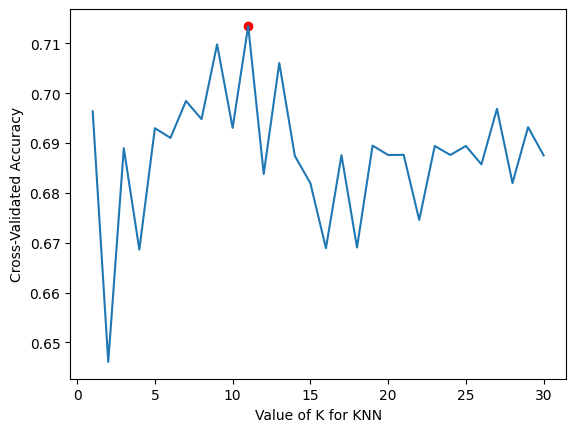

In [54]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
%matplotlib inline


# search for the best value of K within a certain range
k_range = list(range(1, 31))
num_partitions = 10
k_scores = []

####### INSERT IMPLEMENTATION HERaccuracy = accuracy_score(y[test_indices],)E #######
kf = StratifiedKFold(n_splits=num_partitions)
for k in (k_range):
    sum_accuracy = 0
    for fold, (train_indices, test_indices) in enumerate(kf.split(X_train,y_train)):
        y_pred = knn(X_train[test_indices],X_train[train_indices],y_train[train_indices],k)

        accuracy = accuracy_score(y_train[test_indices],y_pred)
        sum_accuracy += accuracy
    k_scores.append(sum_accuracy/num_partitions)

# Visualize Results
plt.plot(k_range, k_scores)
max_index = np.argmax(k_scores)
plt.scatter(k_range[max_index],k_scores[max_index],color ="red")
print("Max Score is at k = ",k_range[max_index])
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [55]:
#predict Y_test with k =11 

y_pred = knn(X_test,X_train,y_train,11)

print(accuracy_score(y_pred,y_test))

0.7575757575757576


Part B

In [56]:
# first do PCA on the X_train set

covariance_matrix = np.cov(X_train,rowvar=False)
print(covariance_matrix)
print(covariance_matrix.shape)

eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print(eigenvalues,eigenvectors)


[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
(140, 140)


LinAlgError: Array must not contain infs or NaNs